# Modelo

In [33]:
import jsonlines
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


file_path = "../data/cleaned_df.jsonlines"
df = pd.read_json(file_path, lines=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 66 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   warranty                           100000 non-null  object        
 1   sub_status                         100000 non-null  object        
 2   condition                          100000 non-null  object        
 3   seller_contact                     100000 non-null  object        
 4   deal_ids                           100000 non-null  object        
 5   base_price                         100000 non-null  float64       
 6   seller_id                          100000 non-null  int64         
 7   variations                         100000 non-null  object        
 8   site_id                            100000 non-null  object        
 9   listing_type_id                    100000 non-null  object        
 10  price                

In [35]:
#X => Columnas con las que predeciremos
X = df[['price', 'base_price', 'sold_quantity', 'available_quantity', 'initial_quantity','accepts_mercadopago', 'local_pick_up', 'free_shipping']]

#y => Columna a predecir
y = df['condition_dummy']

# Podemos verificar que no hayan datos nulos
print(X.isna().sum())
print("condition_dummy", y.isna().sum())

price                  0
base_price             0
sold_quantity          0
available_quantity     0
initial_quantity       0
accepts_mercadopago    0
local_pick_up          0
free_shipping          0
dtype: int64
condition_dummy 0


In [36]:
# 80% Entrenamiento y 20% Prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Lista de modelos a probar
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
}

i = 1
# Iterar sobre los modelos y evaluar su rendimiento
for nombre, modelo in modelos.items():

    print(f"\n Modelo {i}: {nombre}")
    
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = modelo.predict(X_test)
    
    # Evaluación del modelo
    print('Accuracy:', accuracy_score(y_test, y_pred))
    i += 1


 Modelo 1: Regresión Logística
Accuracy: 0.71155

 Modelo 2: Random Forest
Accuracy: 0.79605

 Modelo 3: KNN
Accuracy: 0.77915


El mejor modelo resulta siendo Random Forest, con 79,6% de presición

## Graficas Modelos

### Grafico de barras

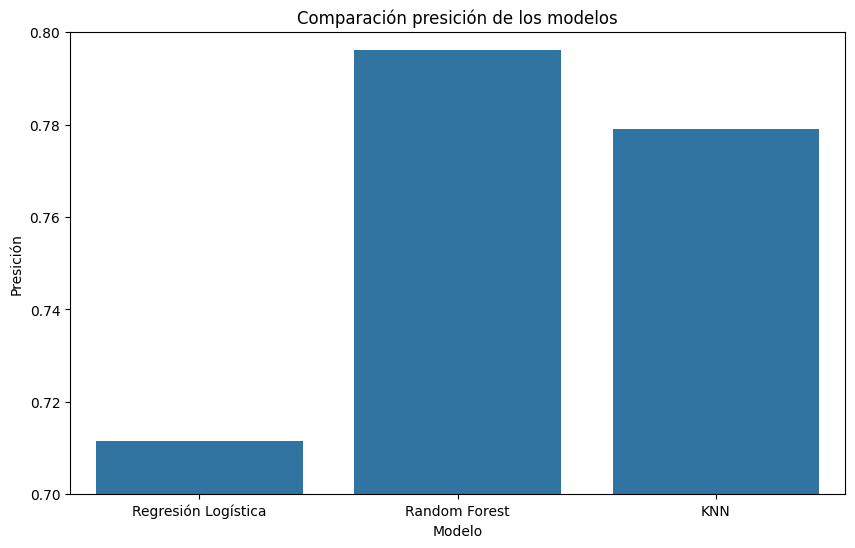

In [38]:
#Grafico de barras

# Resultados obtenidos
model_names = ["Regresión Logística", "Random Forest", "KNN"]
accuracies = [0.71155, 0.79605, 0.77915]

# Gráfico de barras para comparar las precisiones de los modelos
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Comparación presición de los modelos')
plt.ylabel('Presición')
plt.xlabel('Modelo')
plt.ylim(0.7, 0.8)  # Ajustar los límites del eje Y para mostrar mejor la diferencia
plt.show()

En este grafico se destaca la diferencia de presición entre los modelos.

### Matriz de confusión

Accuracy: 0.79605


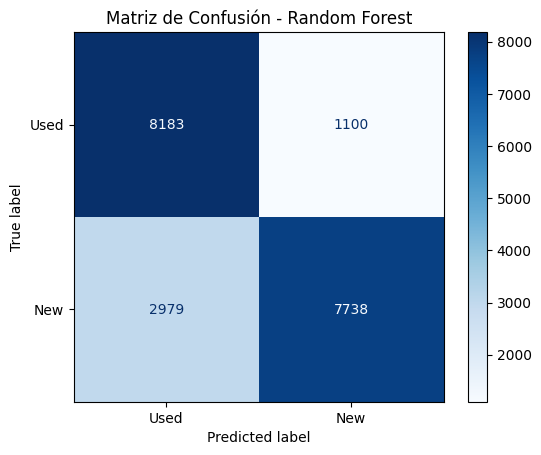

In [40]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Random_Forest_model = RandomForestClassifier(n_estimators=100, random_state=42) #Random Forest model (Por si acaso)
Random_Forest_model.fit(X_train, y_train)
y_pred = Random_Forest_model.predict(X_test)
    
print('Accuracy:', accuracy_score(y_test, y_pred))

# Calcular la matriz
cm = confusion_matrix(y_test, y_pred_rf)

# Graficar
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Used', 'New'])
disp.plot(cmap='Blues')

plt.title('Matriz de Confusión - Random Forest')
plt.show()